In [1]:
from math import floor
from pathlib import Path

from IPython.display import display
from ipywidgets import interact
from PIL import Image, ImageDraw, ImageFont

from digi_leap.ocr import ocr_label

In [2]:
LABELS_DIR = Path('data') / 'labels-1' / 'typewritten'
# LABELS_DIR = Path('data') / 'labels-1' / 'handwritten'

FONTS_DIR = Path('fonts') / 'print' / 'Source_Code_Pro'
FONT = FONTS_DIR / 'SourceCodePro-Regular.ttf'

PREVIOUS = Path('output') / 'ocr_sample_2021-05-10a'
OUTPUT = Path('output') / 'ocr_sample_2021-05-10b'

In [3]:
NAMES = {p.name for p in PREVIOUS.glob('*.jpg')}
IMAGES = [p for p in LABELS_DIR.glob('*.jpg') if p.name in NAMES]

In [4]:
class FontDict(dict):
    def __missing__(self, key):
        return ImageFont.truetype(str(FONT), key)

In [5]:
base = 64
fonts = FontDict()
base_font = ImageFont.truetype(str(FONT), base)

data/labels-1/typewritten/11780319.jpg

self.score=(43, 51.81)
self.found=43
self.percent=51.81
self.total=83
self.stem=''
self.method=['nothing', 'scaled by: 2.0']
self.engine='tesseract'



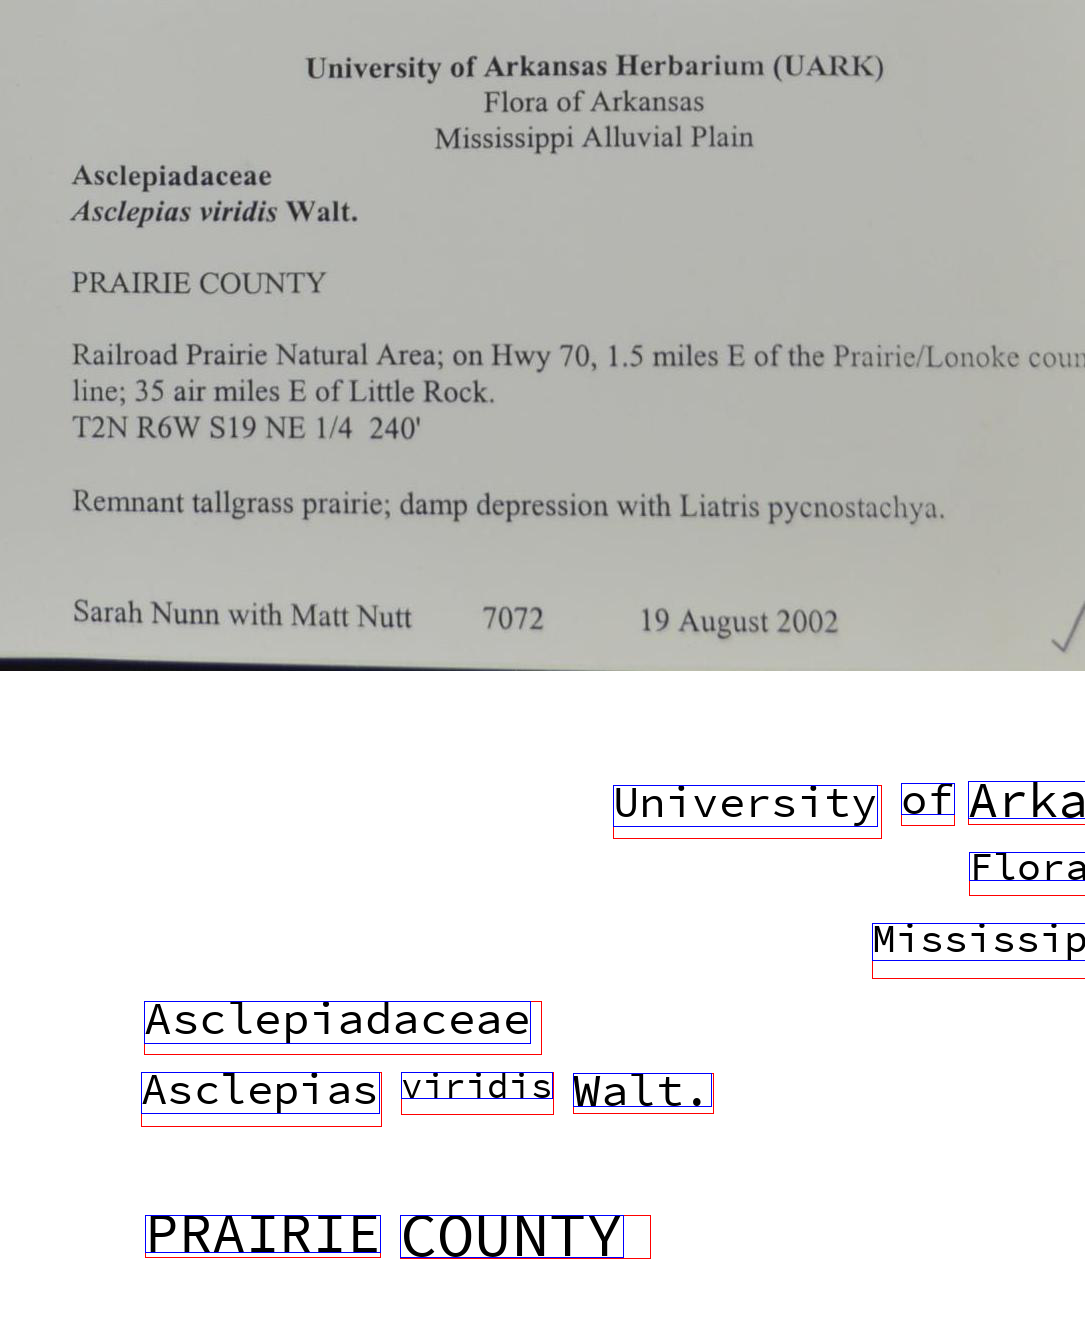

In [6]:
def show_ocr(idx):
    path = IMAGES[idx]
    print(path)
    label = Image.open(path)
    width, height = label.size

    # image = Image.new('RGB', (width * 2, height))
    image = Image.new('RGB', (width, height * 2))
    image.paste(label, (0, 0))

    result = Image.new('RGB', label.size, color='white')

    score = ocr_label(path)
    print(score.score)

    draw = ImageDraw.Draw(result)

    for bbox in score.score.data:
        text = bbox['text']
        bl, bt, br, bb = bbox['left'], bbox['top'], bbox['right'], bbox['bottom']
        tl, tt, tr, tb = draw.textbbox((bl, bt), text, font=base_font, anchor='lt')

        for size in range(base, 8, -2):
            tl, tt, tr, tb = draw.textbbox((bl, bt), text, font=fonts[size], anchor='lt')
            if br >= tr and bb >= tb:
                break
        else:
            continue

        draw.text((bl, bt), text, font=fonts[size], fill='black', anchor='lt')
        draw.rectangle((bl, bt, br, bb), outline='red')
        draw.rectangle((tl, tt, tr, tb), outline='blue')

    # image.paste(result, (width, 0))
    image.paste(result, (0, height))

    display(image)


show_ocr(3)
# interact(show_ocr, idx=(0, len(IMAGES) - 1));